In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

In [2]:
# Database connection details
db_config = {
    'host': 'betting-db.cp86ssaw6cm7.us-east-1.rds.amazonaws.com',
    'user': 'admin',
    'password': '7nRB1i2&A-K>',
    'database': 'betting_db'
}

/var/folders/lj/2t8twtsx5v1dw1dkbr59j1xr0000gn/T/ipykernel_90715/3219707191.py:58: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


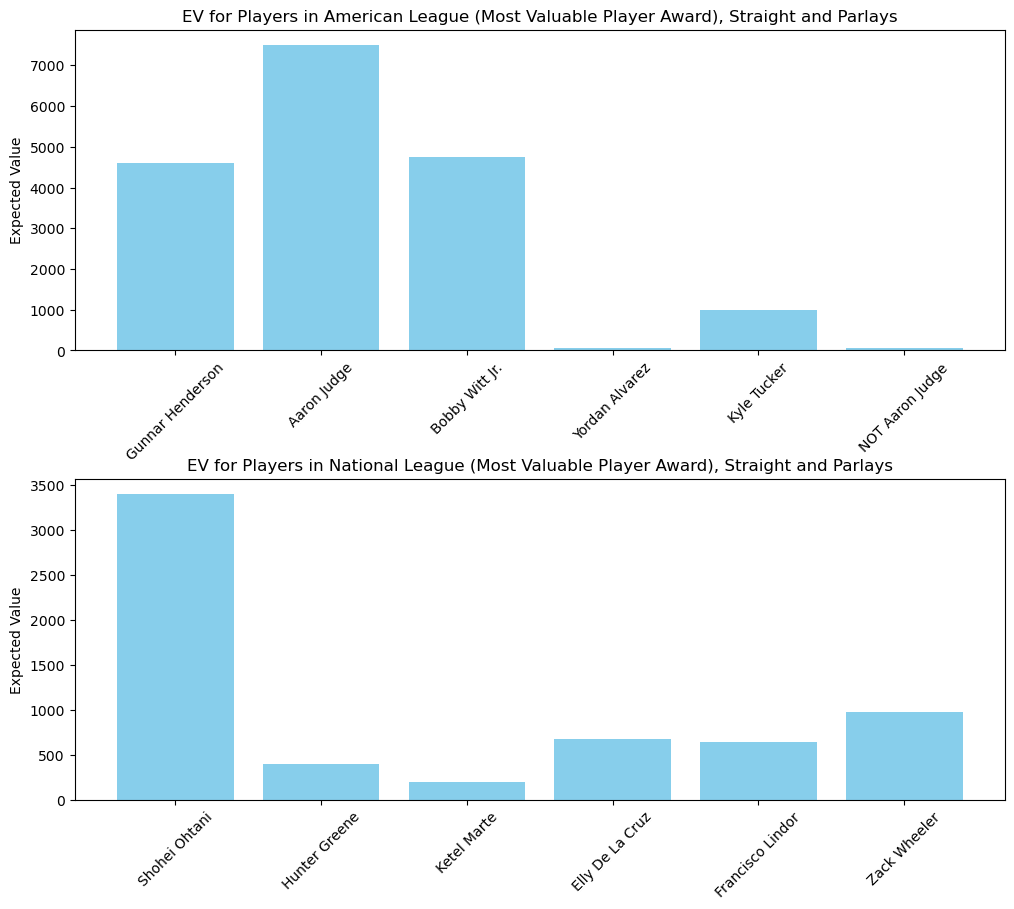

In [28]:
## this bar chart calculates EV for parlays as well, by calculating the product of leg odds within a given parlay
# this product is used as the ImpliedOdds in the EV formula

# List of EventLabels
event_labels = ['American League', 'National League']

# SQL query template with updated implied odds for parlays
query_template = """
WITH LegOddsProduct AS (
    SELECT
        l.WagerID,
        EXP(SUM(LOG(l.ImpliedOdds))) AS ParlayImpliedOdds  -- Calculate the product of the odds for parlay bets
    FROM
        legs l
    JOIN
        bets b ON l.WagerID = b.WagerID
    WHERE
        b.LegCount > 1
    GROUP BY
        l.WagerID
)

SELECT
    l.ParticipantName AS Team,
    l.EventType,
    SUM(
        b.PotentialPayout * 
        CASE 
            WHEN b.LegCount = 1 THEN l.ImpliedOdds  -- For single-leg bets, use the leg's implied odds
            ELSE lop.ParlayImpliedOdds  -- For parlays, use the product of the legs' odds
        END
    ) AS ExpectedValue
FROM
    legs l
JOIN
    bets b ON l.WagerID = b.WagerID
LEFT JOIN
    LegOddsProduct lop ON l.WagerID = lop.WagerID  -- Join to get the calculated parlay implied odds
WHERE
    l.LeagueName = 'MLB'
    AND b.WhichBankroll = 'GreenAleph'
    AND l.IsFuture = 'Yes'
    AND l.EventLabel = '{}'
    AND l.EventType = 'Most Valuable Player Award'
GROUP BY
    l.ParticipantName,
    l.EventType;
"""

# Create a figure with subplots and increase size for less condensed look
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))  # Adjust figure size
axes = axes.flatten()  # Flatten the 2D array of axes to 1D

# Loop through each EventLabel and generate the corresponding bar chart
for i, event_label in enumerate(event_labels):
    # Construct the query for the current EventLabel
    query = query_template.format(event_label)
    
    # Connect to the database and execute the query
    conn = mysql.connector.connect(**db_config)
    df = pd.read_sql(query, conn)
    conn.close()
    
    # Plot the bar chart
    axes[i].bar(df['Team'], df['ExpectedValue'], color='skyblue')
    axes[i].set_ylabel('Expected Value')
    axes[i].set_title(f'EV for Players in {event_label} (Most Valuable Player Award), Straight and Parlays')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout with additional spacing between subplots
plt.subplots_adjust(hspace=0.4)  # Increase space between plots

# Show the plots
plt.show()


/var/folders/lj/2t8twtsx5v1dw1dkbr59j1xr0000gn/T/ipykernel_90715/2116769426.py:37: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


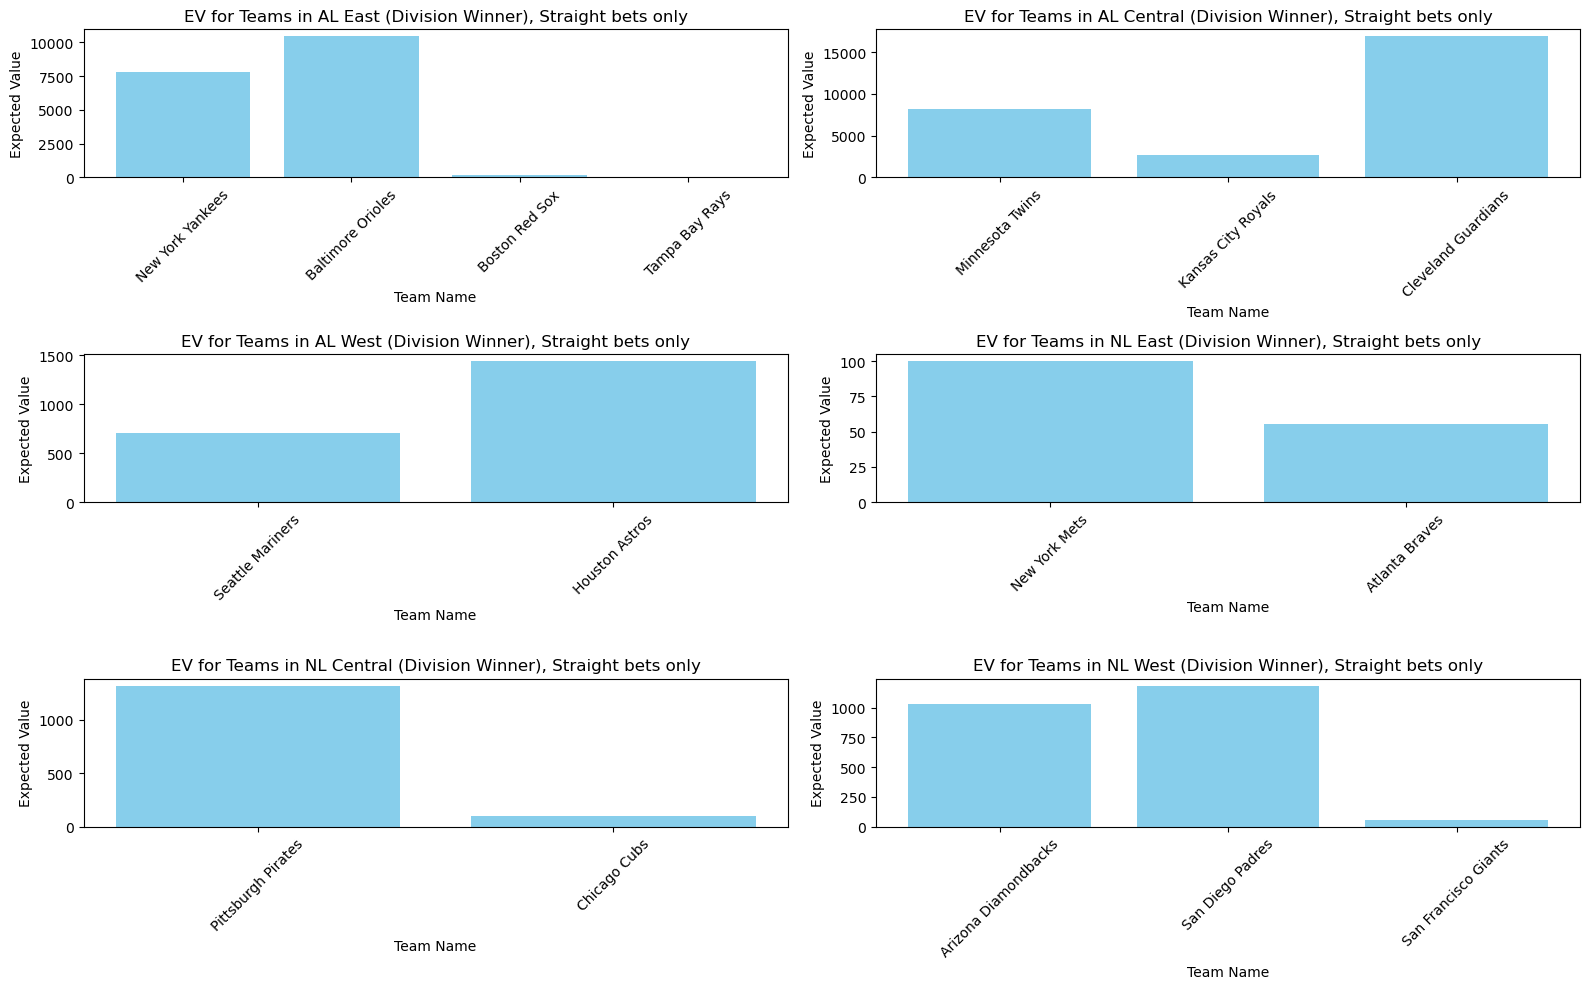

In [21]:
# List of EventLabels
event_labels = ['AL East', 'AL Central', 'AL West', 'NL East', 'NL Central', 'NL West']

# SQL query template
query_template = """
SELECT
    l.ParticipantName AS Team,
    l.EventType,
    SUM(b.PotentialPayout * b.ImpliedOdds) AS ExpectedValue
FROM
    legs l
JOIN
    bets b ON l.WagerID = b.WagerID
WHERE
    l.LeagueName = 'MLB'
    AND b.WhichBankroll = 'GreenAleph'
    AND l.IsFuture = 'Yes'
    AND b.LegCount = 1
    AND l.EventLabel = '{}'
    AND l.EventType = 'Division Winner'
GROUP BY
    l.ParticipantName,
    l.EventType;
"""

# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D

# Loop through each EventLabel and generate the corresponding bar chart
for i, event_label in enumerate(event_labels):
    # Construct the query for the current EventLabel
    query = query_template.format(event_label)
    
    # Connect to the database and execute the query
    conn = mysql.connector.connect(**db_config)
    df = pd.read_sql(query, conn)
    conn.close()
    
    # Plot the bar chart
    axes[i].bar(df['Team'], df['ExpectedValue'], color='skyblue')
    axes[i].set_xlabel('Team Name')
    axes[i].set_ylabel('Expected Value')
    axes[i].set_title(f'EV for Teams in {event_label} (Division Winner), Straight bets only')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

/var/folders/lj/2t8twtsx5v1dw1dkbr59j1xr0000gn/T/ipykernel_90715/3324539708.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
/var/folders/lj/2t8twtsx5v1dw1dkbr59j1xr0000gn/T/ipykernel_90715/3324539708.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(df['Team'], rotation=45, ha='right', fontsize=12, rotation_mode="anchor")
/var/folders/lj/2t8twtsx5v1dw1dkbr59j1xr0000gn/T/ipykernel_90715/3324539708.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
/var/folders/lj/2t8twtsx5v1dw1dkbr59j1xr0000gn/T/ipykerne

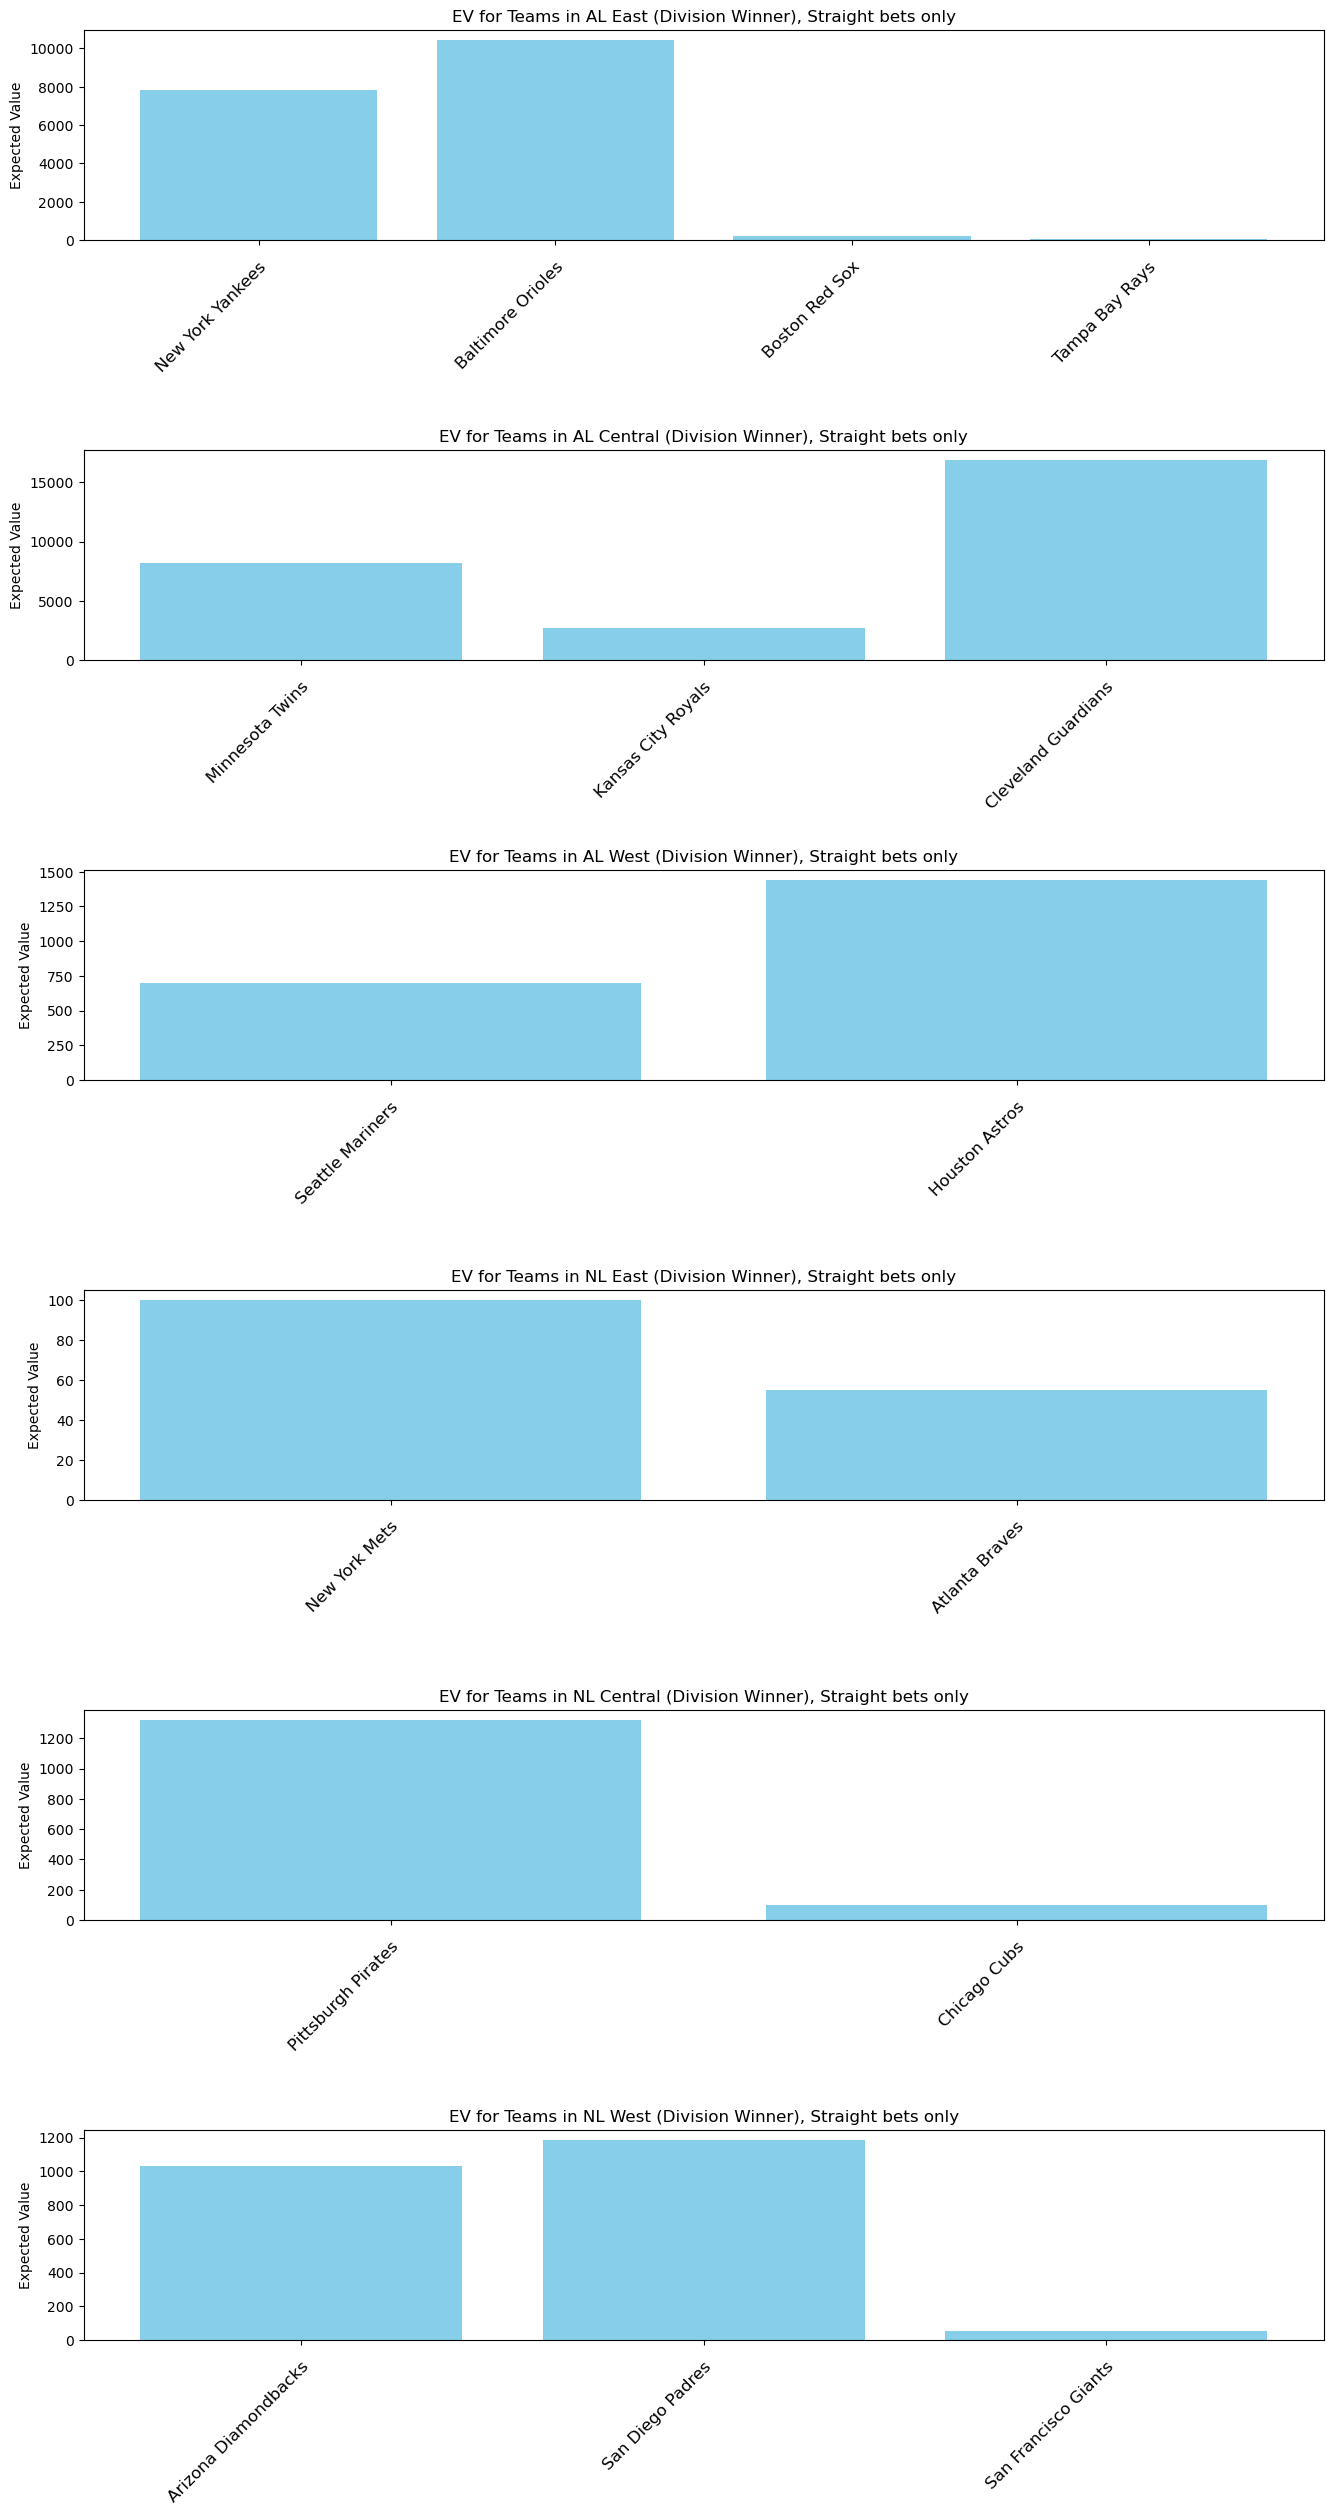

In [25]:
# Create a figure with subplots, one plot per row, large plots
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(16, 30))  # Increase vertical size

# Loop through each EventLabel and generate the corresponding bar chart
for i, event_label in enumerate(event_labels):
    # Construct the query for the current EventLabel
    query = query_template.format(event_label)
    
    # Connect to the database and execute the query
    conn = mysql.connector.connect(**db_config)
    df = pd.read_sql(query, conn)
    conn.close()
    
    # Plot the bar chart
    axes[i].bar(df['Team'], df['ExpectedValue'], color='skyblue')
    axes[i].set_ylabel('Expected Value')
    axes[i].set_title(f'EV for Teams in {event_label} (Division Winner), Straight bets only')
    
    # Rotate x-axis labels and add padding between the labels and plot
    axes[i].set_xticklabels(df['Team'], rotation=45, ha='right', fontsize=12, rotation_mode="anchor")
    axes[i].tick_params(axis='x', pad=10)  # Increase space between x-axis labels and the plot

# Adjust layout with more space between subplots
plt.subplots_adjust(hspace=1)  # Increase space between plots to avoid overlap

# Show the plots
plt.show()


/var/folders/lj/2t8twtsx5v1dw1dkbr59j1xr0000gn/T/ipykernel_90715/776581857.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


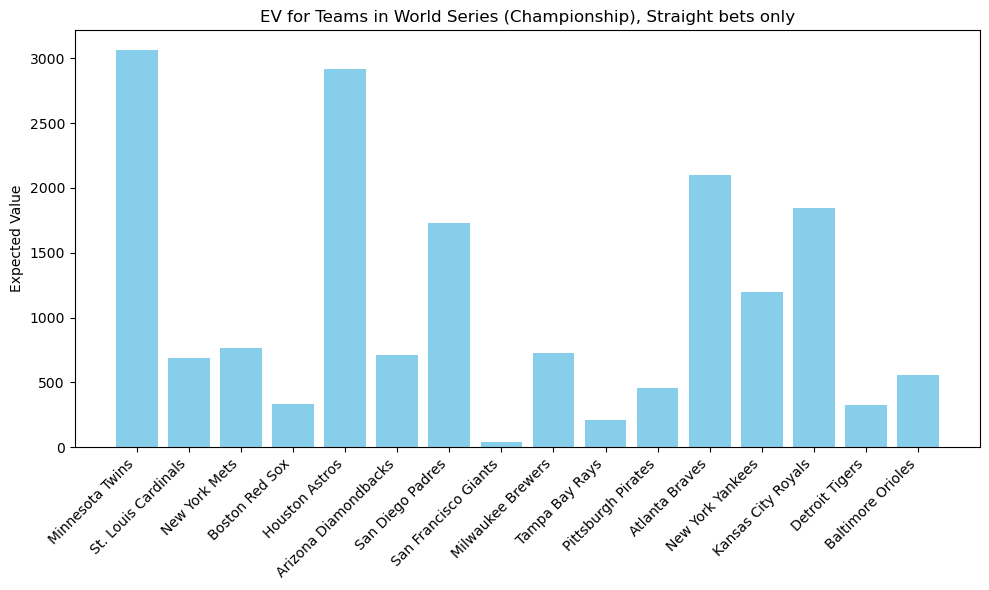

In [17]:
# Create a figure with one plot
fig, ax = plt.subplots(figsize=(10, 6))

# Use the first EventLabel (in this case, 'World Series')
event_label = event_labels[0]

# Construct the query for the current EventLabel
query = query_template.format(event_label)

# Connect to the database and execute the query
conn = mysql.connector.connect(**db_config)
df = pd.read_sql(query, conn)
conn.close()

# Create the bar chart
bars = ax.bar(df['Team'], df['ExpectedValue'], color='skyblue')

# Set the x-ticks to align with the bar positions
ax.set_xticks(range(len(df['Team'])))
ax.set_xticklabels(df['Team'], rotation=45, ha='right')  # Align labels to the right for better readability

# Set the labels and title
ax.set_ylabel('Expected Value')
ax.set_title(f'EV for Teams in {event_label} (Championship), Straight bets only')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [24]:
import requests
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
import time
import matplotlib.pyplot as plt
import mysql.connector
import pandas as pd

# Path to your ChromeDriver
CHROME_DRIVER_PATH = '/Users/aceyvogelstein/Downloads/chromedriver'

# Function to convert American odds to implied probability
def convert_odds_to_probability(odds):
    if odds > 0:
        return 100 / (odds + 100)
    else:
        return abs(odds) / (abs(odds) + 100)

# Function to scrape current odds for Minnesota Twins from RotoWire using Selenium
def scrape_twins_odds_selenium():
    # Set up the Chrome WebDriver using the Service object
    service = Service(CHROME_DRIVER_PATH)
    driver = webdriver.Chrome(service=service)

    # Open the RotoWire odds page
    url = 'https://www.rotowire.com/betting/mlb/division-odds.php'
    driver.get(url)

    # Give the page some time to fully load
    time.sleep(5)

    # Get the page source after the page has fully loaded
    page_source = driver.page_source

    # Close the browser
    driver.quit()

    # Parse the page source with BeautifulSoup
    soup = BeautifulSoup(page_source, 'html.parser')

    # Find the odds for Minnesota Twins
    odds_list = soup.find_all('li', class_='flex')

    twins_odds = None
    for item in odds_list:
        team_name_element = item.find('div', class_='odds-list__entity')
        odds_element = item.find('div', class_='odds-list__odds')
        
        if team_name_element and odds_element:
            team_name = team_name_element.text.strip()
            odds = odds_element.text.strip()
            
            if 'Twins' in team_name:
                # Convert the odds from string to integer (removing the + sign)
                try:
                    twins_odds = int(odds.replace('+', '').strip())
                except ValueError:
                    twins_odds = None
                break

    if twins_odds is None:
        raise Exception('Odds for the Minnesota Twins not found.')
    
    return twins_odds

# Scrape the current odds for Minnesota Twins using Selenium
try:
    current_odds = scrape_twins_odds_selenium()
    print(f"Current odds for the Minnesota Twins: {current_odds}")

    # Convert the scraped odds to implied probability
    implied_probability = convert_odds_to_probability(current_odds)
    print(f"Implied probability for the Minnesota Twins: {implied_probability:.4f}")

except Exception as e:
    print(e)
    implied_probability = None  # Handle the case where scraping fails

# If odds were successfully scraped, proceed with database connection
if implied_probability is not None:
    # Connect to your MySQL database
    conn = mysql.connector.connect(
        host='betting-db.cp86ssaw6cm7.us-east-1.rds.amazonaws.com',
        user='admin',
        password='7nRB1i2&A-K>',
        database='betting_db'
    )

    # Query the database for Minnesota Twins straight bets
    query = """
    SELECT b.DollarsAtStake, b.PotentialPayout
    FROM bets b
    JOIN legs l ON b.WagerID = l.WagerID
    WHERE l.ParticipantName = 'Minnesota Twins'
      AND l.EventType = 'Division Winner'
      AND b.WhichBankroll = 'GreenAleph'
      AND b.WLCA != 'Cashout'
      AND l.LeagueName = 'MLB'
    """
    df = pd.read_sql(query, conn)

    # Function to calculate expected value using the scraped implied probability
    def calculate_expected_value(potential_payout, implied_probability):
        return potential_payout * implied_probability

    # Calculate expected value using the scraped implied probability
    df['ExpectedValue'] = df['PotentialPayout'] * implied_probability

    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(['Minnesota Twins'], [df['ExpectedValue'].sum()], color='blue')

    # Add labels and title
    plt.ylabel('Expected Value ($)')
    plt.title(f'Expected Value of Minnesota Twins to Win AL Central (Odds: {current_odds}, Implied Probability: {implied_probability:.2%})')

    # Show the chart
    plt.show()

    # Close the database connection
    conn.close()


Odds for the Minnesota Twins not found.


In [8]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
import time

# Path to your ChromeDriver (your correct path)
CHROME_DRIVER_PATH = '/Users/aceyvogelstein/Downloads/chromedriver'

# Set up the Chrome WebDriver using the Service object
service = Service(CHROME_DRIVER_PATH)
driver = webdriver.Chrome(service=service)

# Open the webpage
url = 'https://www.rotowire.com/betting/mlb/division-odds.php'
driver.get(url)

# Give the page some time to load
time.sleep(3)  # Wait 3 seconds for the page to load fully

# Get the page source after the page has fully loaded
page_source = driver.page_source

# Close the browser
driver.quit()

# Parse the page source with BeautifulSoup
soup = BeautifulSoup(page_source, 'html.parser')

# Find all list items with class 'flex'
odds_list = soup.find_all('li', class_='flex')

# Initialize variables
twins_odds = None

# Iterate over each list item (li) to find the Minnesota Twins odds
for item in odds_list:
    team_name_element = item.find('div', class_='odds-list__entity')
    odds_element = item.find('div', class_='odds-list__odds')
    
    if team_name_element and odds_element:
        team_name = team_name_element.text.strip()
        odds = odds_element.text.strip()
        
        if 'Twins' in team_name:  # Check if the team is Minnesota Twins
            twins_odds = odds
            break

# Display the odds or a message if not found
if twins_odds:
    print(f'The current odds for the Minnesota Twins to win the division are: {twins_odds}')
else:
    print('Odds for the Minnesota Twins not found.')


Odds for the Minnesota Twins not found.


In [6]:
import requests
from bs4 import BeautifulSoup

# Define the URL of the page with the odds
url = 'https://www.rotowire.com/betting/mlb/division-odds.php'

# Send a GET request to fetch the HTML content of the page
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# Find the HTML element containing the odds
# The specific class or id might need adjustment based on the webpage structure
odds_table = soup.find('table', class_='odds-table')  # Update the class based on inspection

# Initialize variables
twins_probability = None

# Iterate over table rows to find the Minnesota Twins odds
for row in odds_table.find_all('tr')[1:]:  # Skip header row
    columns = row.find_all('td')
    team_name = columns[0].text.strip()
    if team_name == 'Minnesota Twins':
        odds_text = columns[1].text.strip()  # Assuming the odds are in the second column
        # Convert the odds to probability
        odds_decimal = float(odds_text.replace('+', '').replace('-', ''))  # Handle + and - odds
        if odds_decimal < 0:
            probability = -odds_decimal / (-odds_decimal - 100)
        else:
            probability = 100 / (odds_decimal + 100)
        twins_probability = probability
        break

if twins_probability is not None:
    print(f'Current probability for Minnesota Twins to win the division: {twins_probability:.2f}')
else:
    print('Minnesota Twins odds not found.')


AttributeError: 'NoneType' object has no attribute 'find_all'

Mapped Odds Data: {}
Data from DB:                 Team  TotalPotentialPayout
0   New York Yankees              13740.64
1  Baltimore Orioles              26424.50
2     Boston Red Sox               6200.00
3     Tampa Bay Rays              27005.00
Calculated Data: Empty DataFrame
Columns: [Team, TotalPotentialPayout, CurrentOdds, ImpliedProbability, ExpectedValue]
Index: []


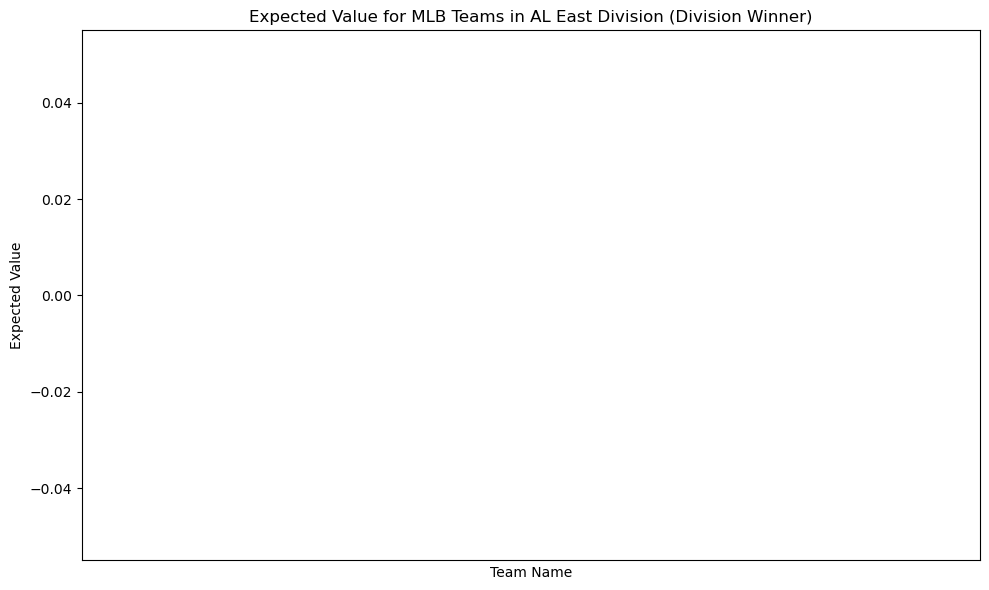

In [19]:
from sqlalchemy import create_engine
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Database connection details
db_config = {
    'host': 'betting-db.cp86ssaw6cm7.us-east-1.rds.amazonaws.com',
    'user': 'admin',
    'password': '7nRB1i2&A-K>',
    'database': 'betting_db'
}

# Create SQLAlchemy engine for MySQL connection
engine = create_engine(f"mysql+mysqlconnector://{db_config['user']}:{db_config['password']}@{db_config['host']}/{db_config['database']}")

# Scrape current DraftKings odds for AL East using requests and BeautifulSoup
def scrape_current_odds():
    url = 'https://www.rotowire.com/betting/mlb/al-east-odds.php'
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code != 200:
        raise Exception(f"Failed to load page. Status code: {response.status_code}")

    # Parse the HTML content
    soup = BeautifulSoup(response.content, 'html.parser')

    # Dictionary to store team odds
    odds_data = {}

    # Extract team names and corresponding DraftKings odds
    rows = soup.find_all('tr')[1:]  # Skip header row
    for row in rows:
        cells = row.find_all('td')
        team = cells[0].text.strip()  # Scraped team name
        draftkings_odds = cells[2].text.strip()  # DraftKings odds (column 3)
        
        if draftkings_odds:
            odds_data[team] = float(draftkings_odds)
    
    return odds_data

# Function to calculate implied probability from American odds
def calculate_implied_probability(american_odds):
    if american_odds > 0:
        return 100 / (american_odds + 100)
    else:
        return -american_odds / (-american_odds + 100)

# Manually map the scraped team names to the team names in the database
team_name_mapping = {
    'Orioles': 'Baltimore Orioles',
    'Yankees': 'New York Yankees',
    'Blue Jays': 'Toronto Blue Jays',
    'Rays': 'Tampa Bay Rays',
    'Red Sox': 'Boston Red Sox'
}

# Scrape the current DraftKings odds for AL East
odds_data = scrape_current_odds()

# Map the scraped team names to the database team names
mapped_odds_data = {team_name_mapping[team]: odds for team, odds in odds_data.items() if team in team_name_mapping}

# Print mapped odds to verify
print("Mapped Odds Data:", mapped_odds_data)

# SQL query to fetch total potential payout for each team in the AL East
query = """
SELECT
    l.ParticipantName AS Team,
    SUM(b.PotentialPayout) AS TotalPotentialPayout
FROM
    legs l
JOIN
    bets b ON l.WagerID = b.WagerID
WHERE
    l.LeagueName = 'MLB'
    AND b.WhichBankroll = 'GreenAleph'
    AND l.IsFuture = 'Yes'
    AND b.LegCount = 1
    AND l.EventLabel = 'AL East'
    AND l.EventType = 'Division Winner'
GROUP BY
    l.ParticipantName;
"""

# Execute the query using SQLAlchemy engine
df = pd.read_sql(query, engine)

# Print DataFrame to check the result
print("Data from DB:", df.head())

# Add a new column for current implied probabilities based on the mapped odds
df['CurrentOdds'] = df['Team'].map(mapped_odds_data)

# Handle missing odds (drop rows where odds weren't found)
df.dropna(subset=['CurrentOdds'], inplace=True)

# Calculate implied probabilities using the current odds
df['ImpliedProbability'] = df['CurrentOdds'].apply(calculate_implied_probability)

# Calculate Expected Value using the total potential payout and implied probabilities
df['ExpectedValue'] = df['TotalPotentialPayout'] * df['ImpliedProbability']

# Print to check calculations
print("Calculated Data:", df)

# Plot the bar chart
plt.figure(figsize=(10, 6))

# Create the bar plot with team names as x-axis labels
plt.bar(df['Team'], df['ExpectedValue'], color='skyblue')

# Set x-axis labels explicitly from the Team column
plt.xlabel('Team Name')
plt.ylabel('Expected Value')
plt.title('Expected Value for MLB Teams in AL East Division (Division Winner)')

# Explicitly set the x-axis tick labels using the Team column
plt.xticks(ticks=range(len(df['Team'])), labels=df['Team'], rotation=45, ha='right')

plt.tight_layout()  # Adjust layout to fit labels

# Show the plot
plt.show()


Scraped Odds Data: {}
Data from DB:                 Team        EventType  PotentialPayout
0   New York Yankees  Division Winner         13740.64
1  Baltimore Orioles  Division Winner         26424.50
2     Boston Red Sox  Division Winner          6200.00
3     Tampa Bay Rays  Division Winner         27005.00
Calculated Data: Empty DataFrame
Columns: [Team, EventType, PotentialPayout, CurrentOdds, ImpliedProbability, ExpectedValue]
Index: []


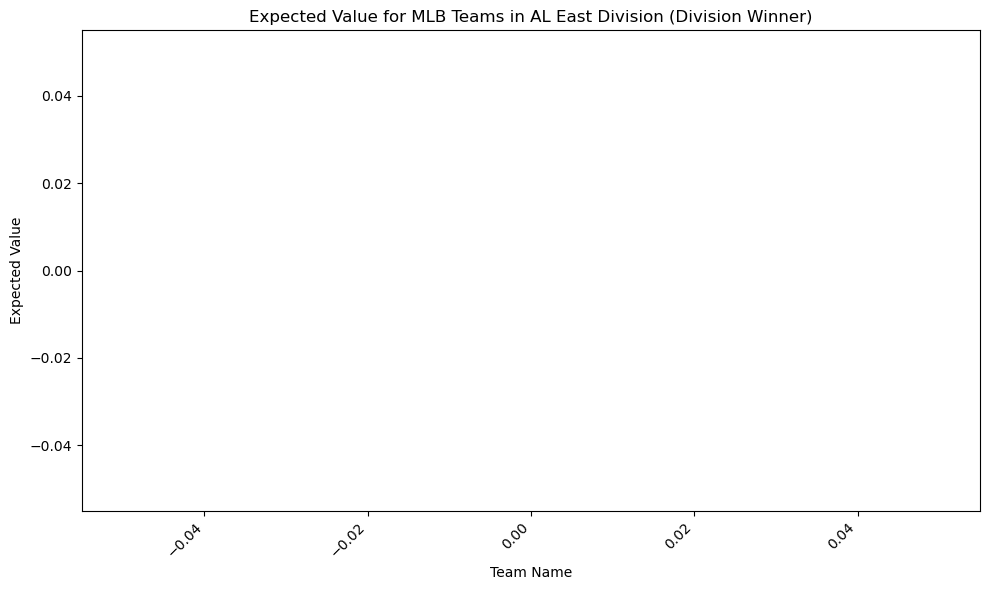

In [4]:
from sqlalchemy import create_engine
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Database connection details
db_config = {
    'host': 'betting-db.cp86ssaw6cm7.us-east-1.rds.amazonaws.com',
    'user': 'admin',
    'password': '7nRB1i2&A-K>',
    'database': 'betting_db'
}

# Create SQLAlchemy engine for MySQL connection
engine = create_engine(f"mysql+mysqlconnector://{db_config['user']}:{db_config['password']}@{db_config['host']}/{db_config['database']}")

# Scrape current DraftKings odds for AL East using requests and BeautifulSoup
def scrape_current_odds():
    url = 'https://www.rotowire.com/betting/mlb/al-east-odds.php'
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code != 200:
        raise Exception(f"Failed to load page. Status code: {response.status_code}")

    # Parse the HTML content
    soup = BeautifulSoup(response.content, 'html.parser')

    # Dictionary to store team odds
    odds_data = {}

    # Extract team names and corresponding DraftKings odds
    rows = soup.find_all('tr')[1:]  # Skip header row
    for row in rows:
        cells = row.find_all('td')
        team = cells[0].text.strip()  # Team name
        draftkings_odds = cells[2].text.strip()  # DraftKings odds (column 3)
        
        if draftkings_odds:
            odds_data[team] = float(draftkings_odds)
    
    return odds_data

# Function to calculate implied probability from American odds
def calculate_implied_probability(american_odds):
    if american_odds > 0:
        return 100 / (american_odds + 100)
    else:
        return -american_odds / (-american_odds + 100)

# Scrape the current DraftKings odds for AL East
odds_data = scrape_current_odds()

# Print scraped odds to verify
print("Scraped Odds Data:", odds_data)

# SQL query to fetch data from your database (without calculating Expected Value)
query = """
SELECT
    l.ParticipantName AS Team,
    l.EventType,
    SUM(b.PotentialPayout) AS PotentialPayout
FROM
    legs l
JOIN
    bets b ON l.WagerID = b.WagerID
WHERE
    l.LeagueName = 'MLB'
    AND b.WhichBankroll = 'GreenAleph'
    AND l.IsFuture = 'Yes'
    AND b.LegCount = 1
    AND l.EventLabel = 'AL East'
    AND l.EventType = 'Division Winner'
GROUP BY
    l.ParticipantName,
    l.EventType;
"""

# Execute the query using SQLAlchemy engine
df = pd.read_sql(query, engine)

# Print DataFrame to check the result
print("Data from DB:", df.head())

# Add a new column for current implied probabilities based on scraped odds
df['CurrentOdds'] = df['Team'].map(odds_data)

# Handle missing odds (drop rows where odds weren't found)
df.dropna(subset=['CurrentOdds'], inplace=True)

# Calculate implied probabilities using the current odds
df['ImpliedProbability'] = df['CurrentOdds'].apply(calculate_implied_probability)

# Now calculate the Expected Value using the scraped odds
df['ExpectedValue'] = df['PotentialPayout'] * df['ImpliedProbability']

# Print to check calculations
print("Calculated Data:", df)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['Team'], df['ExpectedValue'], color='skyblue')
plt.xlabel('Team Name')
plt.ylabel('Expected Value')
plt.title('Expected Value for MLB Teams in AL East Division (Division Winner)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels

# Show the plot
plt.show()


Scraped Odds Data: {}
Data from DB:                 Team        EventType  PotentialPayout
0   New York Yankees  Division Winner         13740.64
1  Baltimore Orioles  Division Winner         26424.50
2     Boston Red Sox  Division Winner          6200.00
3     Tampa Bay Rays  Division Winner         27005.00


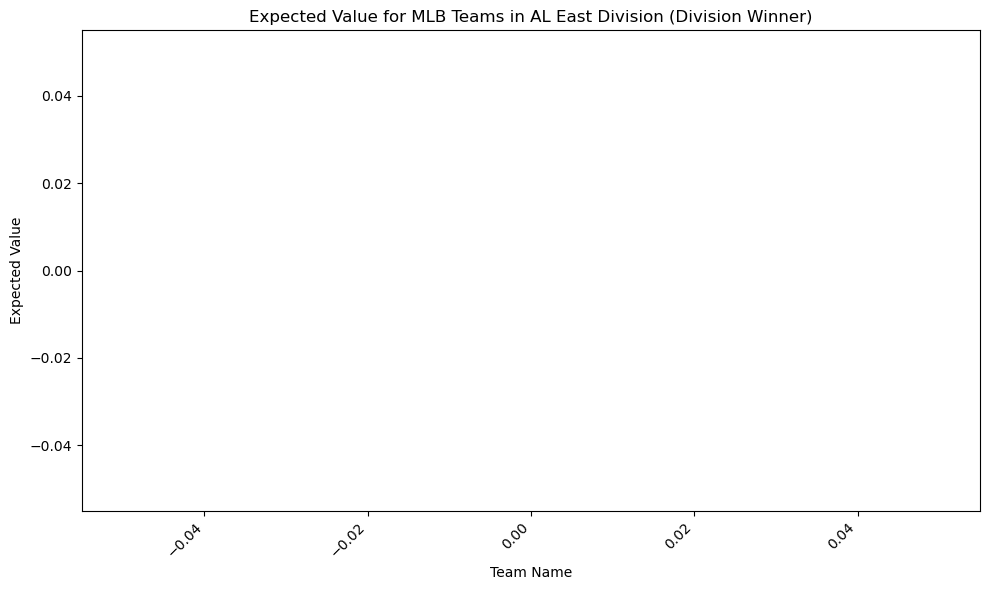

In [5]:
from sqlalchemy import create_engine
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Database connection details
db_config = {
    'host': 'betting-db.cp86ssaw6cm7.us-east-1.rds.amazonaws.com',
    'user': 'admin',
    'password': '7nRB1i2&A-K>',
    'database': 'betting_db'
}

# Create SQLAlchemy engine for MySQL connection
engine = create_engine(f"mysql+mysqlconnector://{db_config['user']}:{db_config['password']}@{db_config['host']}/{db_config['database']}")

# Scrape current DraftKings odds for AL East using requests and BeautifulSoup
def scrape_current_odds():
    url = 'https://www.rotowire.com/betting/mlb/al-east-odds.php'
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code != 200:
        raise Exception(f"Failed to load page. Status code: {response.status_code}")

    # Parse the HTML content
    soup = BeautifulSoup(response.content, 'html.parser')

    # Dictionary to store team odds
    odds_data = {}

    # Extract team names and corresponding DraftKings odds
    rows = soup.find_all('tr')[1:]  # Skip header row
    for row in rows:
        cells = row.find_all('td')
        team = cells[0].text.strip()  # Team name
        draftkings_odds = cells[2].text.strip()  # DraftKings odds (column 3)
        
        if draftkings_odds:
            odds_data[team] = float(draftkings_odds)
    
    return odds_data

# Function to calculate implied probability from American odds
def calculate_implied_probability(american_odds):
    if american_odds > 0:
        return 100 / (american_odds + 100)
    else:
        return -american_odds / (-american_odds + 100)

# Scrape the current DraftKings odds for AL East
odds_data = scrape_current_odds()

# Print scraped odds to verify
print("Scraped Odds Data:", odds_data)

# SQL query to fetch data from your database
query = """
SELECT
    l.ParticipantName AS Team,
    l.EventType,
    SUM(b.PotentialPayout) AS PotentialPayout
FROM
    legs l
JOIN
    bets b ON l.WagerID = b.WagerID
WHERE
    l.LeagueName = 'MLB'
    AND b.WhichBankroll = 'GreenAleph'
    AND l.IsFuture = 'Yes'
    AND b.LegCount = 1
    AND l.EventLabel = 'AL East'
    AND l.EventType = 'Division Winner'
GROUP BY
    l.ParticipantName,
    l.EventType;
"""

# Execute the query using SQLAlchemy engine
df = pd.read_sql(query, engine)

# Print DataFrame to check the result
print("Data from DB:", df.head())

# Add a new column for current implied probabilities based on scraped odds
df['CurrentOdds'] = df['Team'].map(odds_data)

# Handle missing odds (drop rows where odds weren't found)
df.dropna(subset=['CurrentOdds'], inplace=True)

# Calculate implied probabilities using the current odds
df['ImpliedProbability'] = df['CurrentOdds'].apply(calculate_implied_probability)

# Calculate Expected Value using the current odds and implied probabilities
df['ExpectedValue'] = df['PotentialPayout'] * df['ImpliedProbability']

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df['Team'], df['ExpectedValue'], color='skyblue')
plt.xlabel('Team Name')
plt.ylabel('Expected Value')
plt.title('Expected Value for MLB Teams in AL East Division (Division Winner)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels

# Show the plot
plt.show()


/var/folders/lj/2t8twtsx5v1dw1dkbr59j1xr0000gn/T/ipykernel_55454/271652339.py:37: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


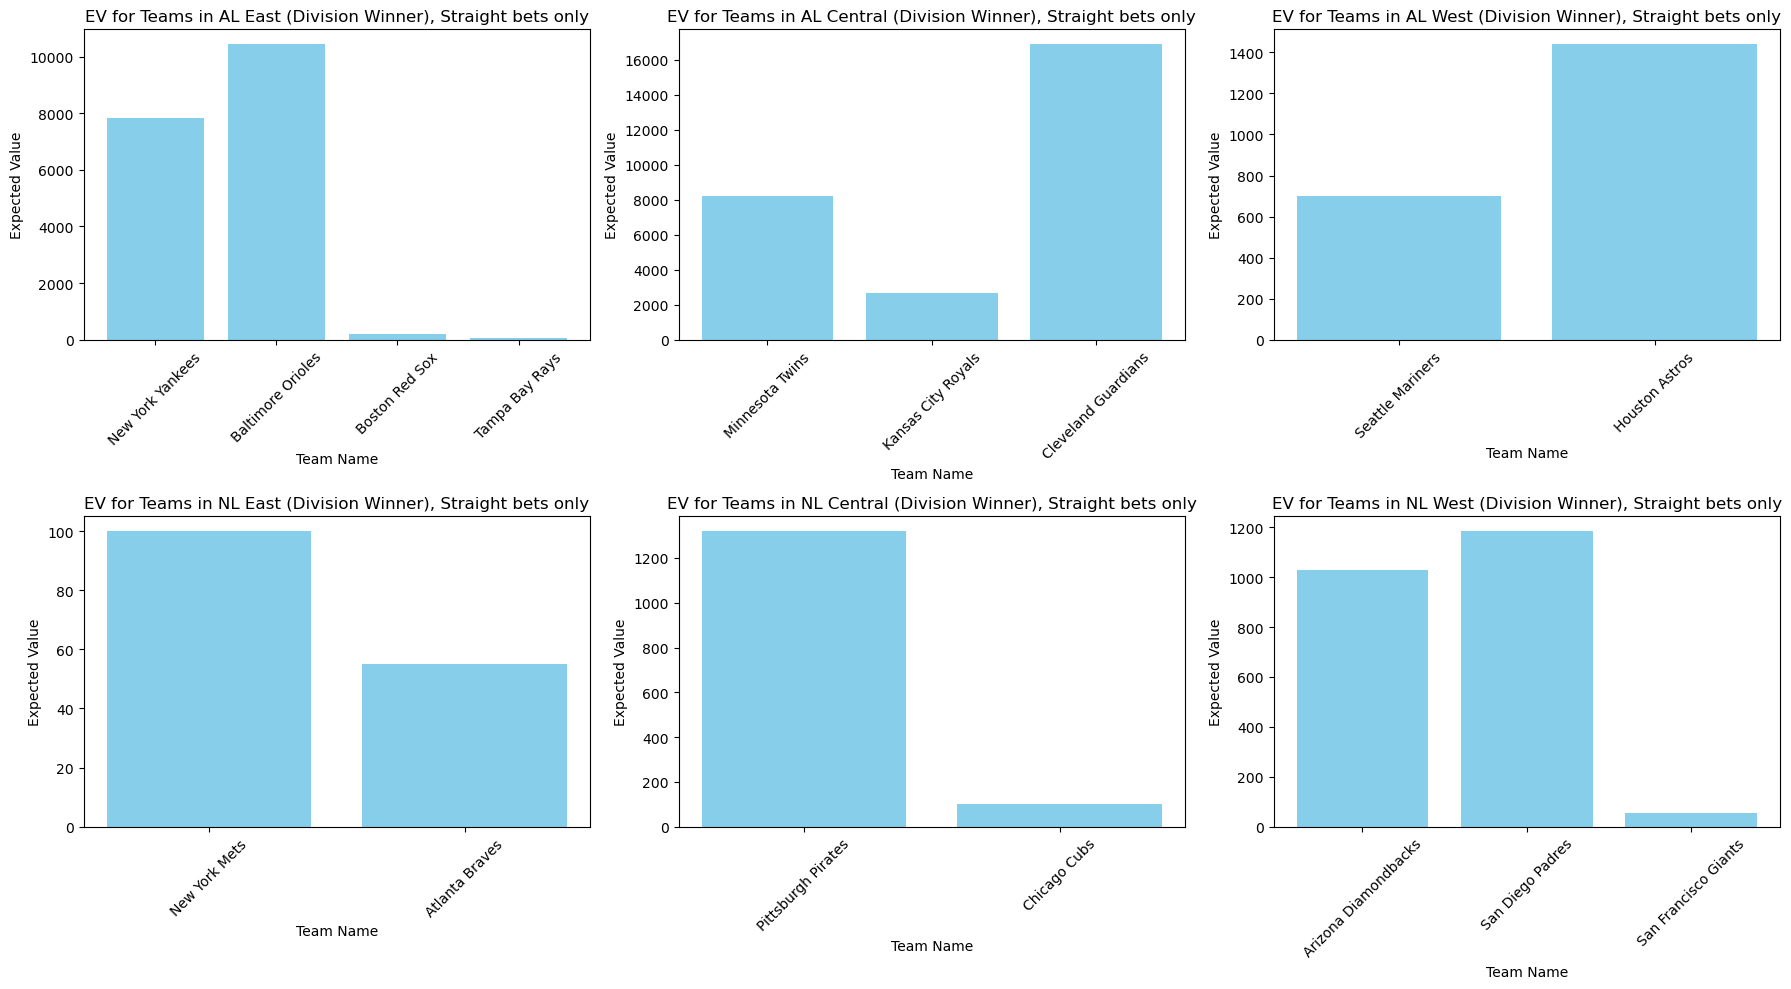

In [7]:
# List of EventLabels
event_labels = ['AL East', 'AL Central', 'AL West', 'NL East', 'NL Central', 'NL West']

# SQL query template
query_template = """
SELECT
    l.ParticipantName AS Team,
    l.EventType,
    SUM(b.PotentialPayout * b.ImpliedOdds) AS ExpectedValue
FROM
    legs l
JOIN
    bets b ON l.WagerID = b.WagerID
WHERE
    l.LeagueName = 'MLB'
    AND b.WhichBankroll = 'GreenAleph'
    AND l.IsFuture = 'Yes'
    AND b.LegCount = 1
    AND l.EventLabel = '{}'
    AND l.EventType = 'Division Winner'
GROUP BY
    l.ParticipantName,
    l.EventType;
"""

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D

# Loop through each EventLabel and generate the corresponding bar chart
for i, event_label in enumerate(event_labels):
    # Construct the query for the current EventLabel
    query = query_template.format(event_label)
    
    # Connect to the database and execute the query
    conn = mysql.connector.connect(**db_config)
    df = pd.read_sql(query, conn)
    conn.close()
    
    # Plot the bar chart
    axes[i].bar(df['Team'], df['ExpectedValue'], color='skyblue')
    axes[i].set_xlabel('Team Name')
    axes[i].set_ylabel('Expected Value')
    axes[i].set_title(f'EV for Teams in {event_label} (Division Winner), Straight bets only')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [8]:
# SQL query template for parlays (LegCount > 1) with EventType = 'Conference Winner'
parlay_query_template = """
SELECT
    prod_ImpliedOdds.ParticipantName AS Team,
    prod_ImpliedOdds.EventLabel,
    SUM(b.PotentialPayout * prod_ImpliedOdds.ProductImpliedOdds) AS ExpectedValue
FROM
    bets b
JOIN
    (
        SELECT
            l.WagerID,
            l.ParticipantName,
            l.EventLabel,
            EXP(SUM(LOG(l.ImpliedOdds))) AS ProductImpliedOdds
        FROM
            legs l
        WHERE
            l.IsFuture = 'Yes'
            AND l.EventType = 'Conference Winner'
        GROUP BY
            l.WagerID,
            l.ParticipantName,
            l.EventLabel
    ) AS prod_ImpliedOdds ON b.WagerID = prod_ImpliedOdds.WagerID
WHERE
    b.WhichBankroll = 'GreenAleph'
    AND b.LegCount > 1
    AND prod_ImpliedOdds.EventLabel = '{}'
    AND b.WLCA != 'Cashout'
GROUP BY
    prod_ImpliedOdds.ParticipantName,
    prod_ImpliedOdds.EventLabel;
"""

# Rest of your Python code remains unchanged for generating the bar charts


/var/folders/lj/2t8twtsx5v1dw1dkbr59j1xr0000gn/T/ipykernel_55454/3836756975.py:47: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


DatabaseError: Execution failed on sql '
SELECT
    l.ParticipantName AS Team,
    l.EventLabel,
    SUM(b.PotentialPayout * prod_ImpliedOdds.ProductImpliedOdds) AS ExpectedValue
FROM
    bets b
JOIN
    (
        SELECT
            WagerID,
            ParticipantName,
            EventLabel,
            EXP(SUM(LOG(ImpliedOdds))) AS ProductImpliedOdds
        FROM
            legs
        WHERE
            IsFuture = 'Yes'
            AND EventType = 'Conference Winner'
        GROUP BY
            WagerID,
            ParticipantName,
            EventLabel
    ) AS prod_ImpliedOdds ON b.WagerID = prod_ImpliedOdds.WagerID
WHERE
    b.WhichBankroll = 'GreenAleph'
    AND b.LegCount > 1
    AND b.WLCA != 'Cashout'
    AND prod_ImpliedOdds.EventLabel = 'AL East'
GROUP BY
    prod_ImpliedOdds.ParticipantName,
    prod_ImpliedOdds.EventLabel;
': 1054 (42S22): Unknown column 'l.ParticipantName' in 'field list'

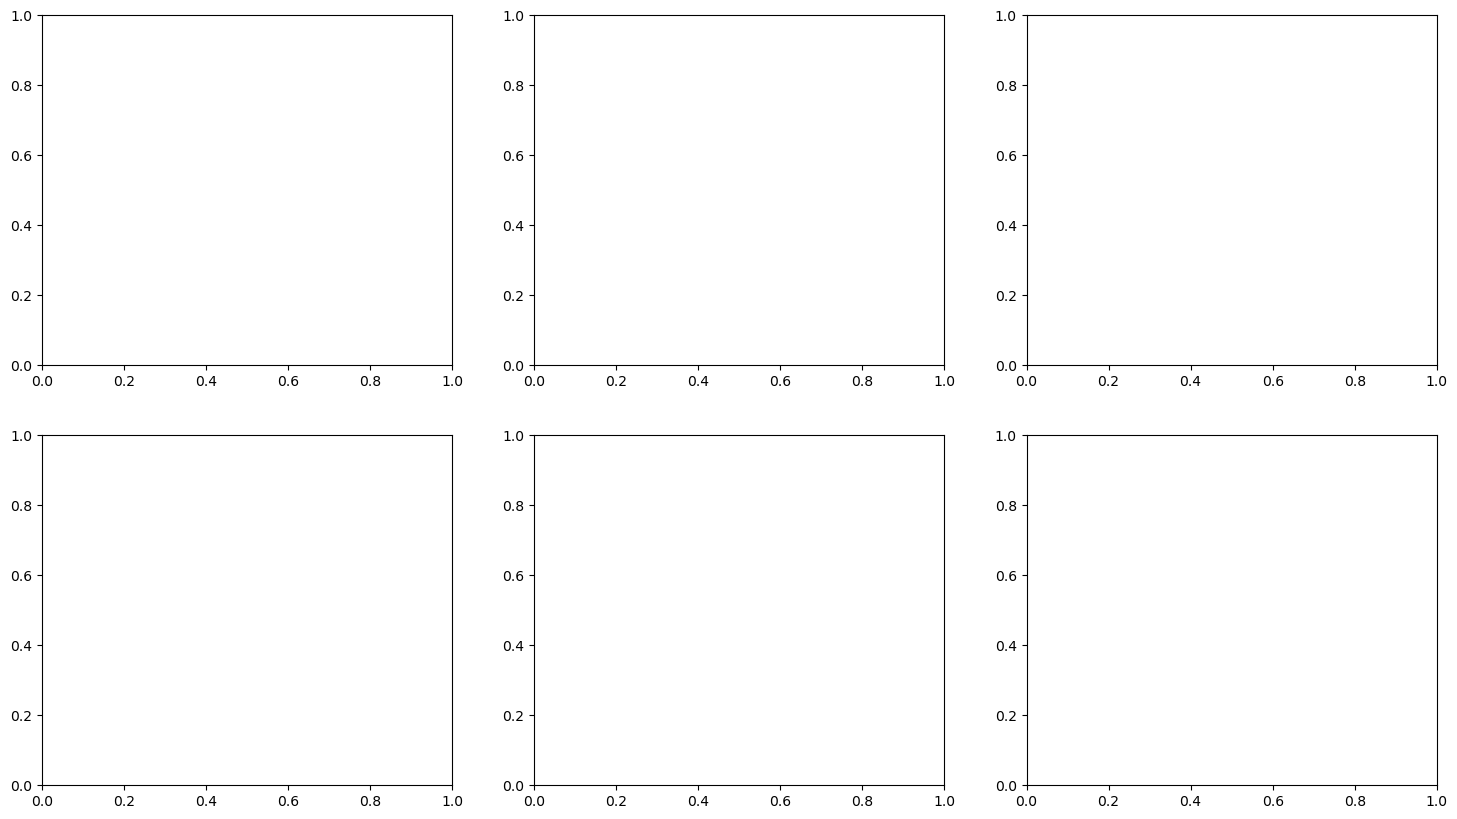

In [9]:
# SQL query template for parlays (LegCount > 1) with EventType = 'Conference Winner'
parlay_query_template = """
SELECT
    l.ParticipantName AS Team,
    l.EventLabel,
    SUM(b.PotentialPayout * prod_ImpliedOdds.ProductImpliedOdds) AS ExpectedValue
FROM
    bets b
JOIN
    (
        SELECT
            WagerID,
            ParticipantName,
            EventLabel,
            EXP(SUM(LOG(ImpliedOdds))) AS ProductImpliedOdds
        FROM
            legs
        WHERE
            IsFuture = 'Yes'
            AND EventType = 'Conference Winner'
        GROUP BY
            WagerID,
            ParticipantName,
            EventLabel
    ) AS prod_ImpliedOdds ON b.WagerID = prod_ImpliedOdds.WagerID
WHERE
    b.WhichBankroll = 'GreenAleph'
    AND b.LegCount > 1
    AND b.WLCA != 'Cashout'
    AND prod_ImpliedOdds.EventLabel = '{}'
GROUP BY
    prod_ImpliedOdds.ParticipantName,
    prod_ImpliedOdds.EventLabel;
"""

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to 1D

# Loop through each EventLabel and generate the corresponding bar chart for parlays
for i, event_label in enumerate(event_labels):
    # Construct the query for the current EventLabel
    query = parlay_query_template.format(event_label)
    
    # Connect to the database and execute the query
    conn = mysql.connector.connect(**db_config)
    df = pd.read_sql(query, conn)
    conn.close()
    
    # Plot the bar chart
    axes[i].bar(df['Team'], df['ExpectedValue'], color='lightgreen')
    axes[i].set_xlabel('Team Name')
    axes[i].set_ylabel('Expected Value')
    axes[i].set_title(f'EV for Teams in {event_label} (Conference Winner), Parlays only')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
